<a href="https://colab.research.google.com/github/Ifra96/820-BDP/blob/main/BDP_NZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 9.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving NZ-address1-.txt to NZ-address1-.txt


In [ ]:
f = open("NZ-address1-.txt", "r") #read
print(f.read())

My opening remarks were in Te Reo Maori, an official language of New Zealand, and the language of the indigenous people of Aotearoa New Zealand.
While geographically remote, New Zealand is deeply connected to our region and globally.
This connectedness drives us to seek common purpose with the countries in this Assembly Hall: a common purpose of a more prosperous, sustainable, and peaceful world for all.
For New Zealanders, diversity is strength.
We strive for a more equal society, and we value strong institutions that promote fairness and deliver for all people.
We are a country founded on the Treaty of Waitangi - Te Tiriti o Waitangi.
This treaty requires a genuine and sustained partnership, and the search for shared solutions.   We still have work to do at home, but these values guide our approach to global cooperation.
Our connectedness also means New Zealand relies on global cooperation - and on multilateralism.
And at the heart of this is the United Nations.
We invest in this sys

In [ ]:
import pandas as pd
df = pd.read_csv("NZ-address1-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,"My opening remarks were in Te Reo Maori, an official language of New Zealand, and the language o..."
1,"While geographically remote, New Zealand is deeply connected to our region and globally."
2,This connectedness drives us to seek common purpose with the countries in this Assembly Hall: a ...
3,"For New Zealanders, diversity is strength."
4,"We strive for a more equal society, and we value strong institutions that promote fairness and d..."
...,...
88,"Now, in 2020, more than ever, the international community must step up - collectively and in the..."
89,"Since 1945, New Zealand has championed the United Nations and the wider international system."
90,Today we recommit to playing our part in ensuring the multilateral system collectively responds ...
91,New Zealand urges all other Member States to do the same.


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', 'excellency', 'one','_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
df

,text,token,clean
0,my opening remarks were in te reo maori an official language of new zealand and the language of ...,"[my, opening, remarks, were, in, te, reo, maori, an, official, language, of, new, zealand, and, ...","[opening, remarks, te, reo, maori, official, language, new, zealand, language, indigenous, peopl..."
1,while geographically remote new zealand is deeply connected to our region and globally,"[while, geographically, remote, new, zealand, is, deeply, connected, to, our, region, and, globa...","[geographically, remote, new, zealand, deeply, connected, region, globally]"
2,this connectedness drives us to seek common purpose with the countries in this assembly hall a c...,"[this, connectedness, drives, us, to, seek, common, purpose, with, the, countries, in, this, ass...","[connectedness, drives, us, seek, common, purpose, countries, assembly, hall, common, purpose, p..."
3,for new zealanders diversity is strength,"[for, new, zealanders, diversity, is, strength]","[new, zealanders, diversity, strength]"
4,we strive for a more equal society and we value strong institutions that promote fairness and de...,"[we, strive, for, a, more, equal, society, and, we, value, strong, institutions, that, promote, ...","[strive, equal, society, value, strong, institutions, promote, fairness, deliver, people]"
...,...,...,...
88,now in 2020 more than ever the international community must step up collectively and in the comm...,"[now, in, 2020, more, than, ever, the, international, community, must, step, up, collectively, a...","[2020, ever, international, community, must, step, collectively, common, interest]"
89,since 1945 new zealand has championed the united_nations and the wider international system,"[since, 1945, new, zealand, has, championed, the, united_nations, and, the, wider, international...","[since, 1945, new, zealand, championed, united_nations, wider, international, system]"
90,today we recommit to playing our part in ensuring the multilateral system collectively responds ...,"[today, we, recommit, to, playing, our, part, in, ensuring, the, multilateral, system, collectiv...","[today, recommit, playing, part, ensuring, multilateral, system, collectively, responds, shared,..."
91,new zealand urges all other member states to do the same,"[new, zealand, urges, all, other, member, states, to, do, the, same]","[new, zealand, urges, member, states]"


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,text,token,clean,stems
0,my opening remarks were in te reo maori an official language of new zealand and the language of ...,"[my, opening, remarks, were, in, te, reo, maori, an, official, language, of, new, zealand, and, ...","[opening, remarks, te, reo, maori, official, language, new, zealand, language, indigenous, peopl...","[opening, remark, te, reo, maori, official, language, new, zealand, language, indigenous, people..."
1,while geographically remote new zealand is deeply connected to our region and globally,"[while, geographically, remote, new, zealand, is, deeply, connected, to, our, region, and, globa...","[geographically, remote, new, zealand, deeply, connected, region, globally]","[geographically, remote, new, zealand, deeply, connect, region, globally]"
2,this connectedness drives us to seek common purpose with the countries in this assembly hall a c...,"[this, connectedness, drives, us, to, seek, common, purpose, with, the, countries, in, this, ass...","[connectedness, drives, us, seek, common, purpose, countries, assembly, hall, common, purpose, p...","[connectedness, drive, us, seek, common, purpose, country, assembly, hall, common, purpose, pros..."
3,for new zealanders diversity is strength,"[for, new, zealanders, diversity, is, strength]","[new, zealanders, diversity, strength]","[new, zealander, diversity, strength]"
4,we strive for a more equal society and we value strong institutions that promote fairness and de...,"[we, strive, for, a, more, equal, society, and, we, value, strong, institutions, that, promote, ...","[strive, equal, society, value, strong, institutions, promote, fairness, deliver, people]","[strive, equal, society, value, strong, institution, promote, fairness, deliver, people]"
...,...,...,...,...
88,now in 2020 more than ever the international community must step up collectively and in the comm...,"[now, in, 2020, more, than, ever, the, international, community, must, step, up, collectively, a...","[2020, ever, international, community, must, step, collectively, common, interest]","[2020, ever, international, community, must, step, collectively, common, interest]"
89,since 1945 new zealand has championed the united_nations and the wider international system,"[since, 1945, new, zealand, has, championed, the, united_nations, and, the, wider, international...","[since, 1945, new, zealand, championed, united_nations, wider, international, system]","[since, 1945, new, zealand, champion, united_nations, wide, international, system]"
90,today we recommit to playing our part in ensuring the multilateral system collectively responds ...,"[today, we, recommit, to, playing, our, part, in, ensuring, the, multilateral, system, collectiv...","[today, recommit, playing, part, ensuring, multilateral, system, collectively, responds, shared,...","[today, recommit, playing, part, ensure, multilateral, system, collectively, respond, share, urg..."
91,new zealand urges all other member states to do the same,"[new, zealand, urges, all, other, member, states, to, do, the, same]","[new, zealand, urges, member, states]","[new, zealand, urge, member, state]"


In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt##


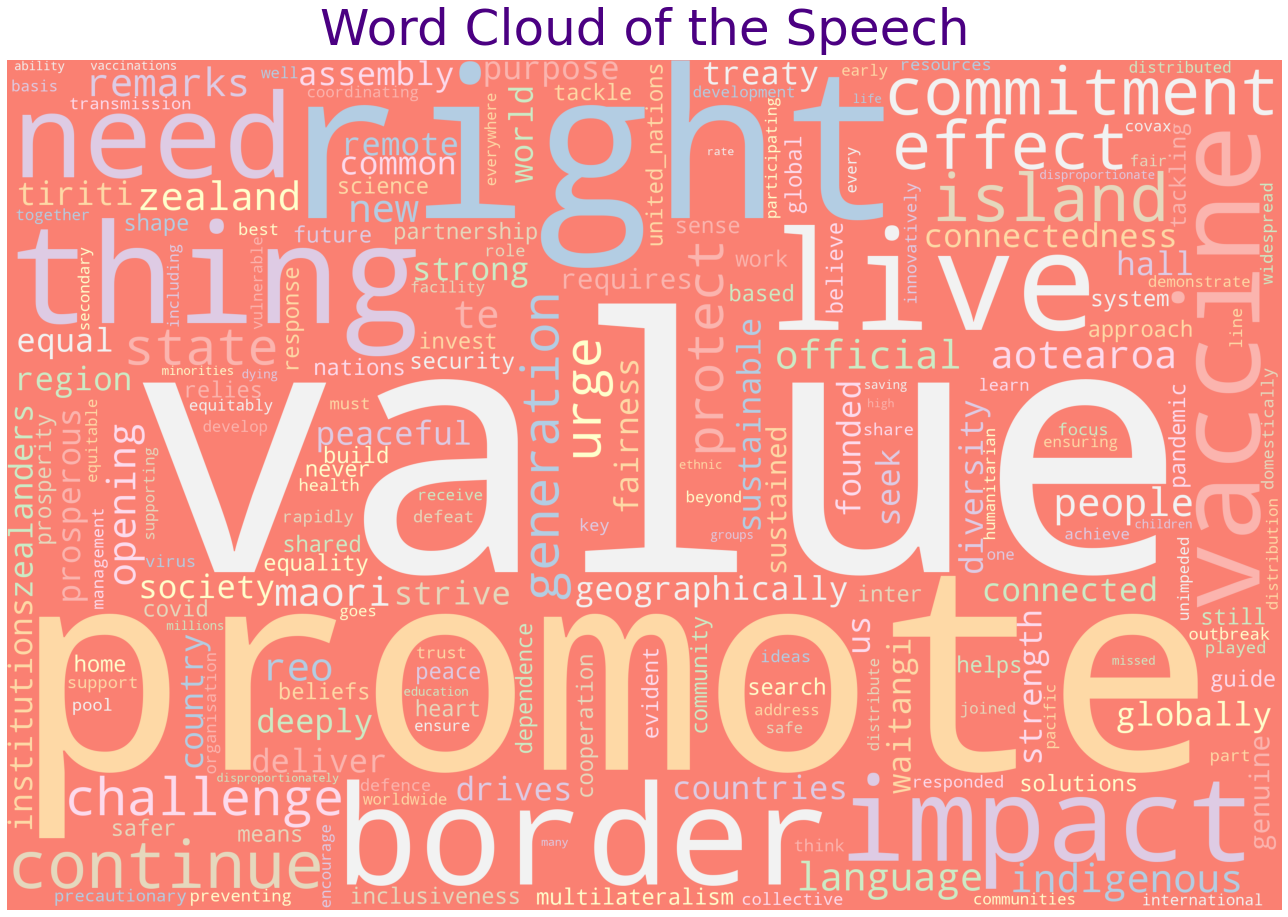

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.052*"basket" + 0.052*"food" + 0.036*"collectively" + 0.036*"people" + 0.030*"ensuring" + 0.027*"challenges" + 0.026*"thrive" + 0.023*"women" + 0.015*"gender" + 0.012*"many"'), (1, '0.047*"nuclear" + 0.035*"weapons" + 0.021*"new" + 0.019*"zealand" + 0.013*"region" + 0.013*"treaty" + 0.013*"prohibition" + 0.013*"elimination" + 0.013*"total" + 0.012*"also"'), (2, '0.028*"world" + 0.028*"must" + 0.025*"international" + 0.018*"pacific" + 0.013*"war" + 0.013*"prepare" + 0.011*"nations" + 0.011*"join" + 0.011*"others" + 0.011*"urge"'), (3, '0.035*"global" + 0.035*"new" + 0.034*"zealand" + 0.027*"system" + 0.026*"today" + 0.025*"recommit" + 0.023*"states" + 0.023*"member" + 0.021*"part" + 0.021*"shared"')]


In [ ]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.037*"new" + 0.025*"zealand" + 0.019*"global" + 0.019*"nuclear" + 0.013*"zealanders" + 0.013*"safe" + 0.013*"focus" + 0.013*"te" + 0.013*"also" + 0.013*"weapons"')
(1, '0.015*"nuclear" + 0.015*"international" + 0.015*"prosperity" + 0.015*"prepare" + 0.015*"food" + 0.015*"basket" + 0.015*"people" + 0.015*"must" + 0.015*"protect" + 0.015*"commitments"')
(2, '0.017*"biodiversity" + 0.017*"best" + 0.017*"economy" + 0.017*"ensuring" + 0.017*"recommit" + 0.017*"people" + 0.009*"work" + 0.009*"recovery" + 0.009*"global" + 0.009*"must"')
(3, '0.025*"world" + 0.025*"common" + 0.017*"countries" + 0.017*"must" + 0.017*"community" + 0.017*"covid" + 0.017*"19" + 0.017*"support" + 0.017*"sustainable" + 0.017*"purpose"')
(4, '0.024*"new" + 0.024*"zealand" + 0.024*"pacific" + 0.024*"region" + 0.024*"covax" + 0.024*"facility" + 0.012*"need" + 0.012*"vulnerable" + 0.012*"better" + 0.012*"opportunity"')
(5, '0.022*"world" + 0.022*"new" + 0.022*"zealand" + 0.022*"war" + 0.022*"right" + 0.012*"invest

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.8873,"global, new, zealand, system, today, recommit, states, member, part, shared","[opening, remarks, te, reo, maori, official, language, new, zealand, language, indigenous, peopl..."
1,1,1.0,0.9155,"nuclear, weapons, new, zealand, region, treaty, prohibition, elimination, total, also","[geographically, remote, new, zealand, deeply, connected, region, globally]"
2,2,2.0,0.9528,"world, must, international, pacific, war, prepare, nations, join, others, urge","[connectedness, drives, us, seek, common, purpose, countries, assembly, hall, common, purpose, p..."
3,3,3.0,0.8487,"global, new, zealand, system, today, recommit, states, member, part, shared","[new, zealanders, diversity, strength]"
4,4,0.0,0.9314,"basket, food, collectively, people, ensuring, challenges, thrive, women, gender, many","[strive, equal, society, value, strong, institutions, promote, fairness, deliver, people]"
5,5,1.0,0.7843,"nuclear, weapons, new, zealand, region, treaty, prohibition, elimination, total, also","[country, founded, treaty, waitangi, te, tiriti, waitangi]"
6,6,3.0,0.9538,"global, new, zealand, system, today, recommit, states, member, part, shared","[treaty, requires, genuine, sustained, partnership, search, shared, solutions, still, work, home..."
7,7,2.0,0.5912,"world, must, international, pacific, war, prepare, nations, join, others, urge","[connectedness, also, means, new, zealand, relies, global, cooperation, multilateralism]"
8,8,3.0,0.7486,"global, new, zealand, system, today, recommit, states, member, part, shared","[heart, united_nations]"
9,9,3.0,0.9298,"global, new, zealand, system, today, recommit, states, member, part, shared","[invest, system, right, thing, helps, build, safer, prosperous, sustainable, future]"


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9523,"basket, food, collectively, people, ensuring, challenges, thrive, women, gender, many","[critical, importance, biodiversity, plays, ensuring, welfare, people, economy, environment, hig..."
1,1.0,0.9499,"nuclear, weapons, new, zealand, region, treaty, prohibition, elimination, total, also","[recent, events, mark, 75th, anniversary, atomic, bombings, hiroshima, nagasaki, recalled, catas..."
2,2.0,0.9528,"world, must, international, pacific, war, prepare, nations, join, others, urge","[connectedness, drives, us, seek, common, purpose, countries, assembly, hall, common, purpose, p..."
3,3.0,0.9538,"global, new, zealand, system, today, recommit, states, member, part, shared","[treaty, requires, genuine, sustained, partnership, search, shared, solutions, still, work, home..."


In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [ ]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.5100613872708962


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [ ]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,my opening remarks were in te reo maori an official language of new zealand and the language of ...,"[my, opening, remarks, were, in, te, reo, maori, an, official, language, of, new, zealand, and, ...","[opening, remarks, te, reo, maori, official, language, new, zealand, language, indigenous, peopl...","[opening, remark, te, reo, maori, official, language, new, zealand, language, indigenous, people...",0.136364,0.454545
1,while geographically remote new zealand is deeply connected to our region and globally,"[while, geographically, remote, new, zealand, is, deeply, connected, to, our, region, and, globa...","[geographically, remote, new, zealand, deeply, connected, region, globally]","[geographically, remote, new, zealand, deeply, connect, region, globally]",0.009091,0.263636
2,this connectedness drives us to seek common purpose with the countries in this assembly hall a c...,"[this, connectedness, drives, us, to, seek, common, purpose, with, the, countries, in, this, ass...","[connectedness, drives, us, seek, common, purpose, countries, assembly, hall, common, purpose, p...","[connectedness, drive, us, seek, common, purpose, country, assembly, hall, common, purpose, pros...",0.037500,0.500000
3,for new zealanders diversity is strength,"[for, new, zealanders, diversity, is, strength]","[new, zealanders, diversity, strength]","[new, zealander, diversity, strength]",0.136364,0.454545
4,we strive for a more equal society and we value strong institutions that promote fairness and de...,"[we, strive, for, a, more, equal, society, and, we, value, strong, institutions, that, promote, ...","[strive, equal, society, value, strong, institutions, promote, fairness, deliver, people]","[strive, equal, society, value, strong, institution, promote, fairness, deliver, people]",0.311111,0.494444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860616bd10>]],
      dtype=object)

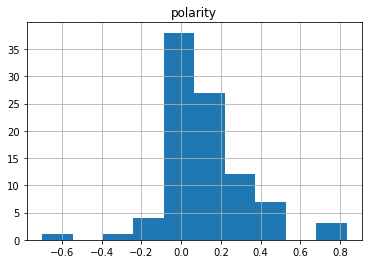

In [ ]:
df.hist(column='polarity')

In [ ]:
df["polarity"].mean()

0.12383477633477637

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86061bf2d0>]],
      dtype=object)

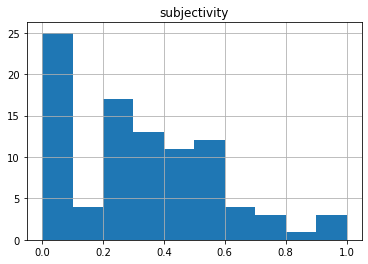

In [ ]:
df.hist(column='subjectivity')

In [ ]:
df["subjectivity"].mean()

0.31485719328461254

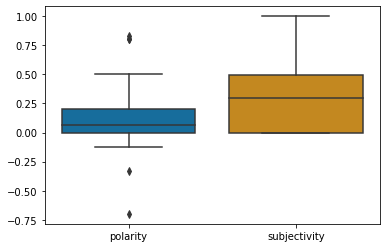

In [ ]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")